In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../extract_pin_addr")
from JicBitstream import JicBitstream, JicBitstreamZip

%matplotlib notebook

In [2]:
def decimate(orig, N):
    M = orig.shape[0] // N
    orig = orig[0 : N * M]
    orig = orig.reshape((M, N))
    dec = np.sum(orig, axis=1)
    return dec

def plot_bitstream(ax, filename, N=1024, upper_lim=None):
    """ Plot bitstream (pop count)

    Arguments
        N: decimation factor
    """

    bitstream = JicBitstream(filename)  # ")

    jic = bitstream.jic
    if upper_lim is not None:
        jic = jic[0:upper_lim]

    dec = decimate(jic, N)
    x = np.linspace(0, jic.shape[0], len(dec)) / 8

    ax.plot(x, dec, label=os.path.basename(filename))

<IPython.core.display.Javascript object>


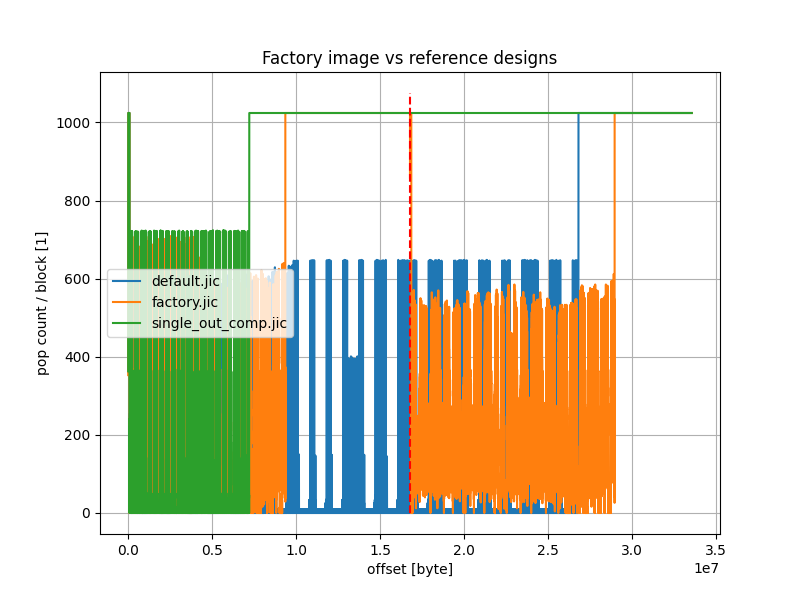

In [3]:
fig = plt.figure(figsize=(8, 6))
ax = fig.subplots()

plot_bitstream(ax, "../../bitstreams/ddr3_ex/default.jic")
plot_bitstream(ax, "../../bitstreams/ref/factory.jic")
plot_bitstream(ax, "../../bitstreams/ddr3_ex/single_out_comp.jic")

ax.plot([16 * 1024 * 1024, 16 * 1024 * 1024], [0, 1024 * 1.05], "r--")
ax.grid()
ax.set_ylabel("pop count / block [1]")
ax.set_xlabel("offset [byte]")
ax.legend()

ax.set_title("Factory image vs reference designs")

None

<IPython.core.display.Javascript object>


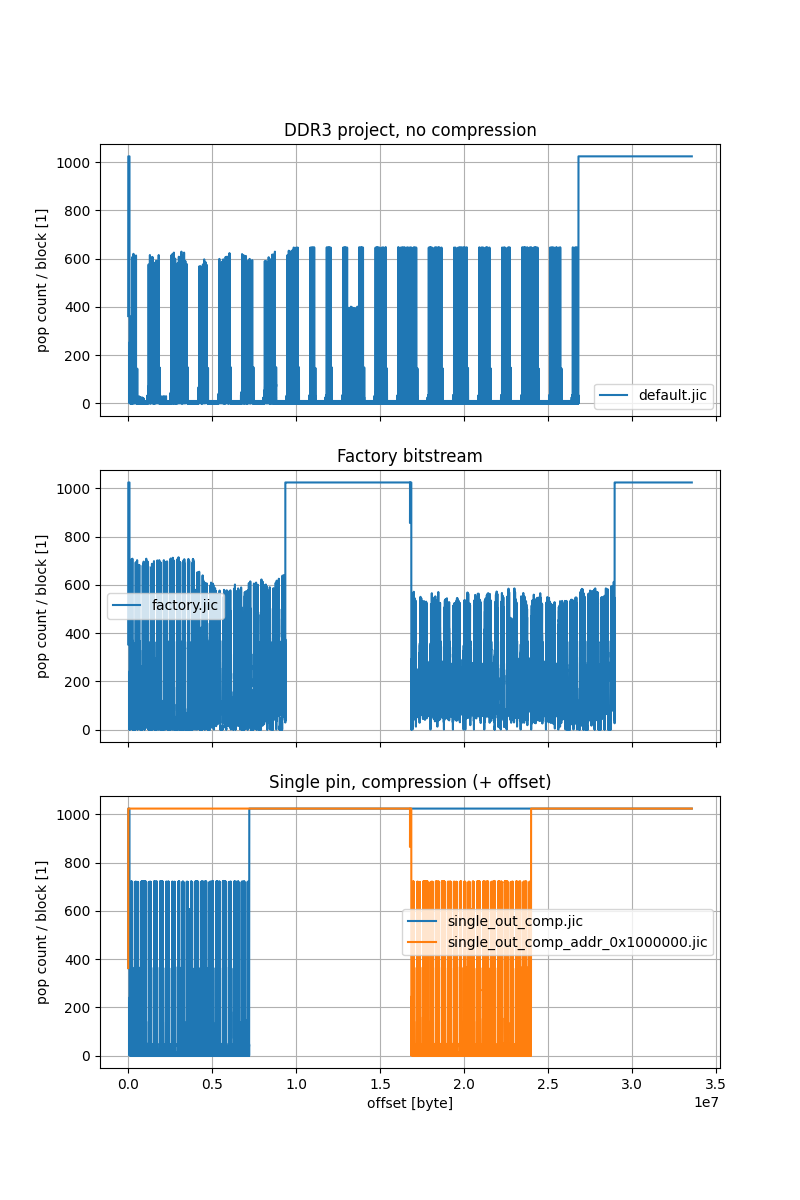

In [4]:
fig = plt.figure(figsize=(8, 12))
(ax1, ax2, ax3) = fig.subplots(3, 1, sharex=True)

plot_bitstream(ax1, "../../bitstreams/ddr3_ex/default.jic")
plot_bitstream(ax2, "../../bitstreams/ref/factory.jic")
plot_bitstream(ax3, "../../bitstreams/ddr3_ex/single_out_comp.jic")
plot_bitstream(ax3, "../../bitstreams/ddr3_ex/single_out_comp_addr_0x1000000.jic")

ax1.set_title("DDR3 project, no compression")
ax1.grid(True)
ax1.set_ylabel("pop count / block [1]")
ax1.legend()

ax2.set_title("Factory bitstream")
ax2.grid(True)
ax2.set_ylabel("pop count / block [1]")
ax2.legend()

ax3.set_title("Single pin, compression (+ offset)")
ax3.grid(True)
ax3.set_ylabel("pop count / block [1]")
ax3.set_xlabel("offset [byte]")
ax3.legend()

None

<IPython.core.display.Javascript object>


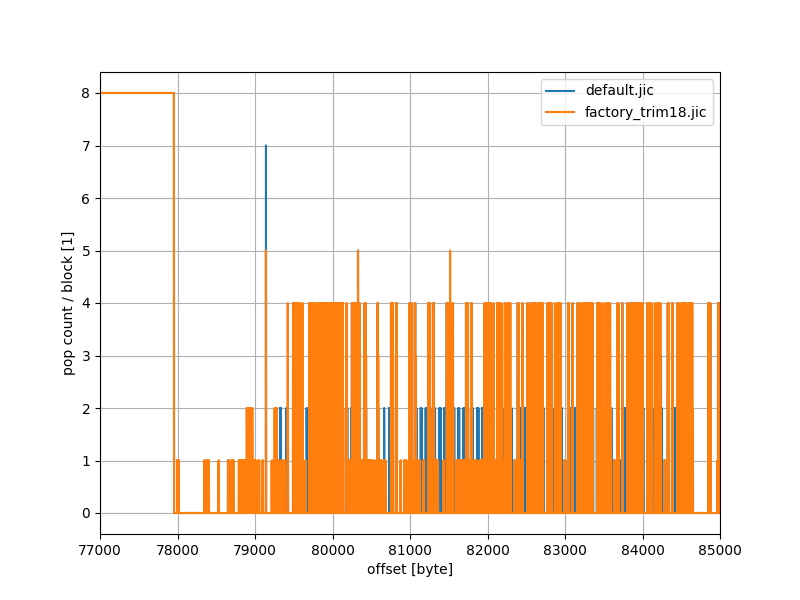

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.subplots()

N=8
upper_lim=1000000

plot_bitstream(ax, "../../bitstreams/ddr3_ex/default.jic", N, upper_lim)
plot_bitstream(ax, "../../bitstreams/ref/factory_trim18.jic", N, upper_lim)

ax.grid(True)
ax.set_ylabel("pop count / block [1]")
ax.set_xlabel("offset [byte]")
ax.legend()
ax.set_xlim((77000, 85000))

None

<IPython.core.display.Javascript object>


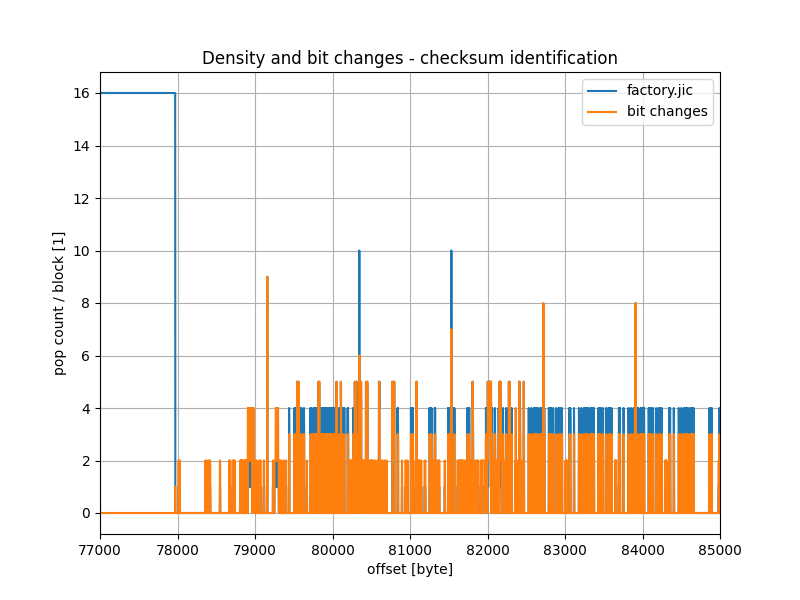

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.subplots()

N=16

plot_bitstream(ax, "../../bitstreams/ref/factory.jic", N)

ax.set_xlim((77000, 85000))
ax.grid(True)
ax.set_ylabel("pop count / block [1]")
ax.set_xlabel("offset [byte]")

ax.set_title("Density and bit changes - checksum identification")

jic = JicBitstream("../../bitstreams/ref/factory.jic").jic.astype(int)
jic_diff = np.abs(np.diff(jic))
jic_diff_dec = decimate(jic_diff, N)
x = np.linspace(0, jic_diff.shape[0], len(jic_diff_dec)) / 8
ax.plot(x, jic_diff_dec, label="bit changes")

ax.legend()

None